In [32]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [59]:
fp22 = h5py.File('output22.hdf','r')
fp33 = h5py.File('output33.hdf','r')
fp2233 = h5py.File('output2233.hdf','r')
fp223344 = h5py.File('output223344.hdf','r')
fp2233_re = h5py.File('rescaled2233.hdf','r')
fp223344_re = h5py.File('rescaled223344.hdf','r')

In [60]:
print(fp223344_re['shm'].keys())

<KeysViewHDF5 ['sh2', 'sh3', 'shm']>


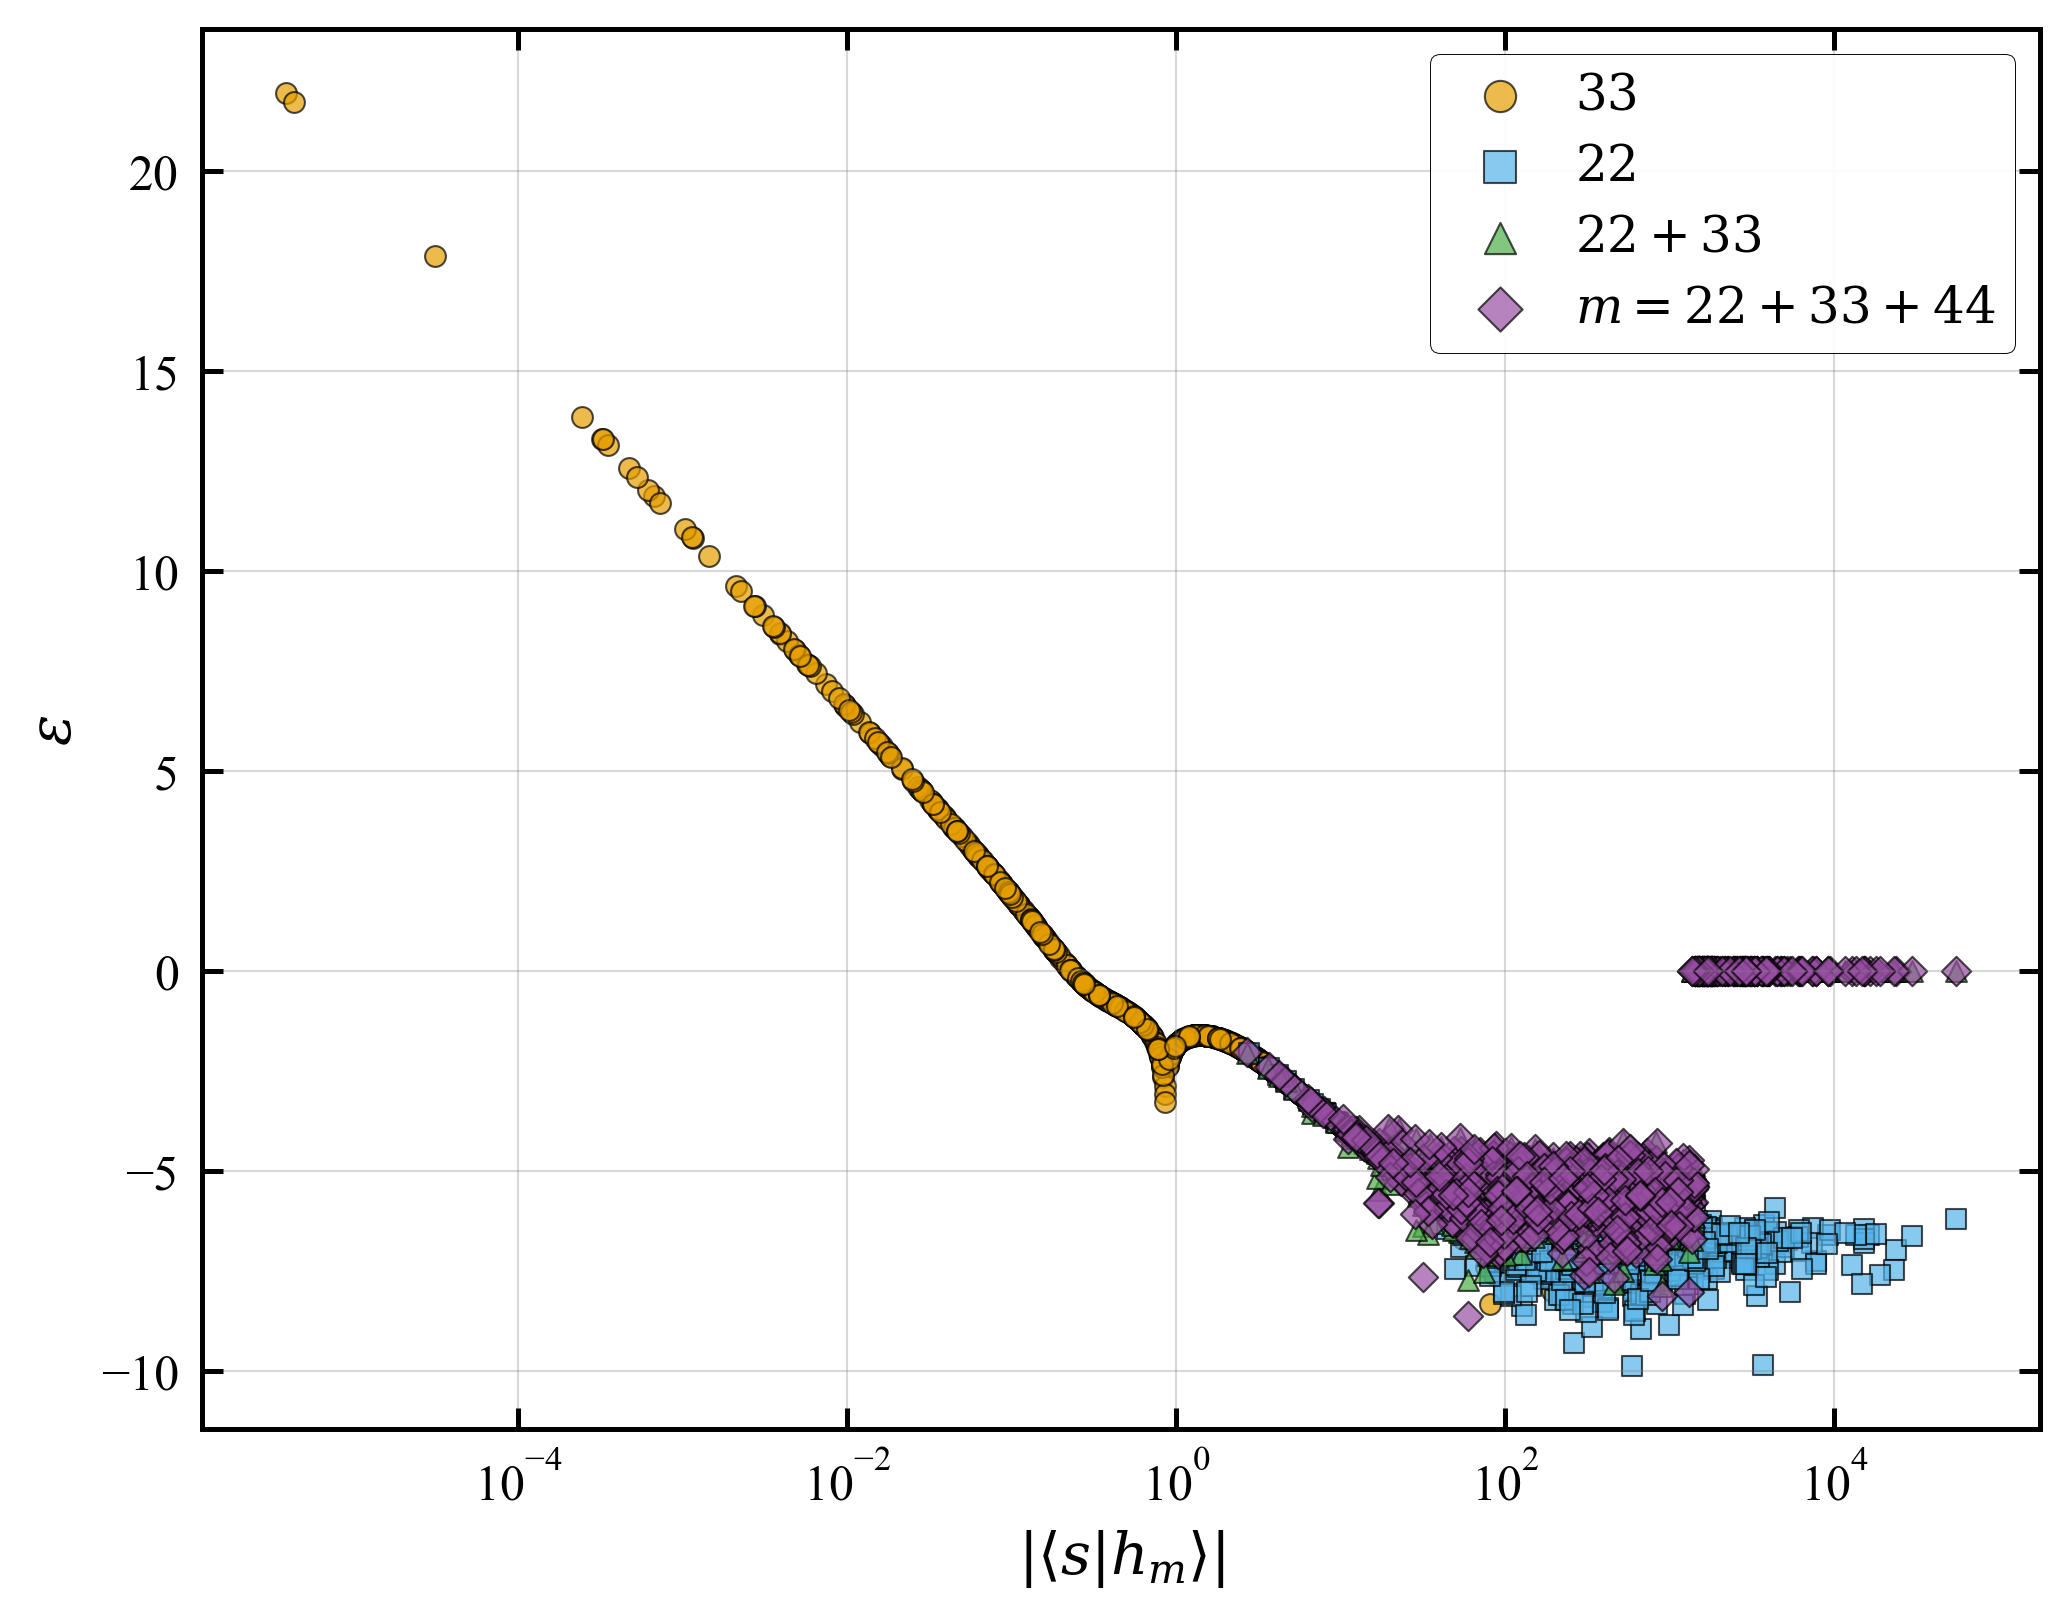

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set publication-quality style
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3

# Create figure with appropriate size for journal (single column ~3.5", double column ~7")
fig, ax = plt.subplots(figsize=(7, 5.5), dpi=300)

colors = ['#E69F00', '#56B4E9','#4DAF4A','#984EA3']  
markers = ['o', 's', '^', 'D']
size = 25
ax.scatter(fp33['shm']['sh3'], fp33['errors'], 
           label=r'$33$',
           s=size, alpha=0.7, 
           color=colors[0], 
           marker=markers[0],
           edgecolors='black',
           linewidths=0.5)

ax.scatter(fp22['shm']['sh2'], fp22['errors'], 
           label=r'$22$',
           s=size, alpha=0.7, 
           color=colors[1], 
           marker=markers[1],
           edgecolors='black',
           linewidths=0.5)

ax.scatter(fp2233['shm']['shm'], fp2233['errors'], 
           label=r'$22+33$',
           s=size, alpha=0.7, 
           color=colors[2], 
           marker=markers[2],
           edgecolors='black',
           linewidths=0.5)

ax.scatter(fp223344['shm']['shm'], fp223344['errors'], 
           label=r'$m=22+33+44$',
           s=size, alpha=0.7, 
           color=colors[3], 
           marker=markers[3],
           edgecolors='black',
           linewidths=0.5)

ax.set_xscale('log')
#ax.set_xlim(left=1)
ax.set_xlabel(r'$|\langle s | h_{m} \rangle|$', fontsize=14)
ax.set_ylabel(r'$\epsilon$', fontsize=14)

ax.tick_params(labelsize=12, which='both', direction='in', top=True, right=True)

ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.3, color='gray')
ax.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.2, color='gray')

ax.legend(loc='best', frameon=True, framealpha=0.95, 
          edgecolor='black', fontsize=12, 
          markerscale=1.5, handletextpad=0.5)

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.tight_layout()

plt.show()

# fig.savefig('figure.pdf', dpi=300, bbox_inches='tight', format='pdf')
fig.savefig('accuracy.png', dpi=300, bbox_inches='tight')

In [36]:
sh3_23 = np.array(fp2233['shm']['sh3'])
sh2_23 = np.array(fp2233['shm']['sh2'])
shm_23 = np.array(fp2233['shm']['shm'])

sh2_234 = np.array(fp223344['shm']['sh2'])
sh3_234 = np.array(fp223344['shm']['sh3'])
sh4_234 = np.array(fp223344['shm']['sh4'])
shm_234 = np.array(fp223344['shm']['shm'])

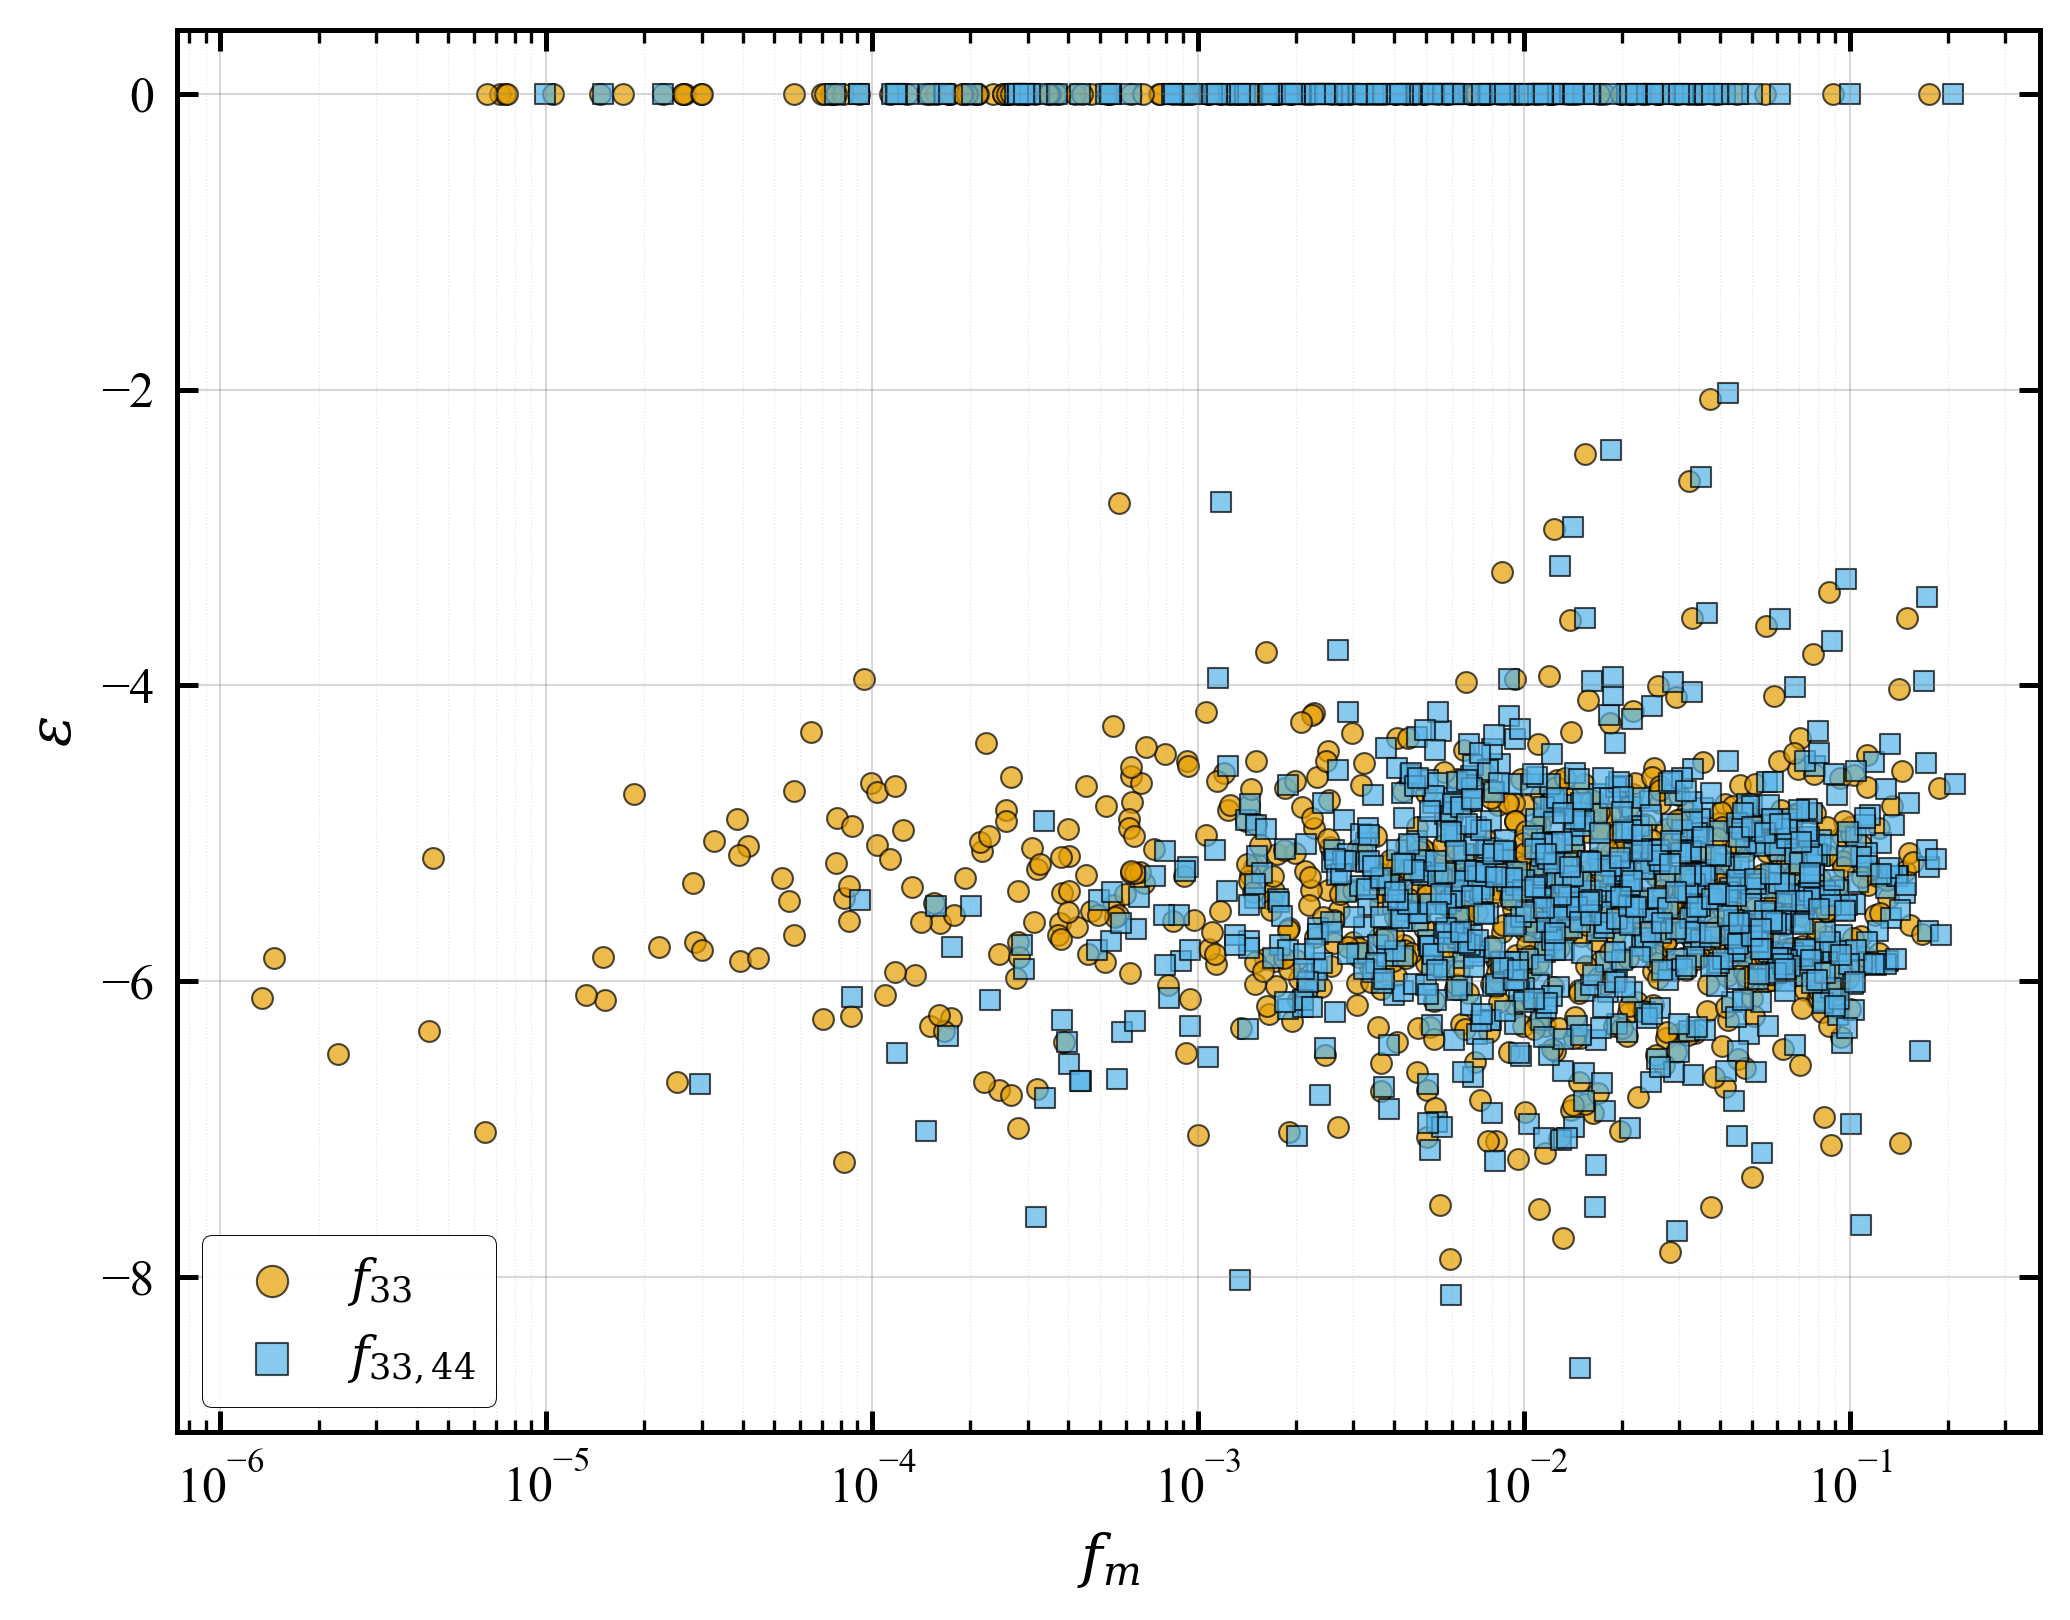

In [55]:
fig2,ax2 = plt.subplots(figsize=(7, 5.5), dpi=300)

ax2.scatter(((sh3_23)/shm_23), fp2233['errors'], 
           label=r'$f_{33}$',
           s=25, alpha=0.7, 
           color=colors[0], 
           marker=markers[0],
           edgecolors='black',
           linewidths=0.5)

ax2.scatter(((sh3_234+sh4_234)/shm_234), fp223344['errors'], 
           label=r'$f_{33,44}$',
           s=25, alpha=0.7, 
           color=colors[1], 
           marker=markers[1],
           edgecolors='black',
           linewidths=0.5)

ax2.set_xscale('log')

ax2.set_xlabel(r'$f_{m}$', fontsize=14)
ax2.set_ylabel(r'$\epsilon$', fontsize=14)

ax2.tick_params(labelsize=12, which='both', direction='in', top=True, right=True)

ax2.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.3, color='gray')
ax2.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.2, color='gray')

ax2.legend(loc='best', frameon=True, framealpha=0.95, 
          edgecolor='black', fontsize=12, 
          markerscale=1.5, handletextpad=0.5)

ax2.set_facecolor('white')
fig2.patch.set_facecolor('white')

plt.tight_layout()

plt.show()

# fig.savefig('figure.pdf', dpi=300, bbox_inches='tight', format='pdf')
fig2.savefig('mode_fraction.png', dpi=300, bbox_inches='tight')

In [38]:
e_23 = np.array(fp2233['errors'])
e_234 = np.array(fp223344['errors'])

In [39]:
bad_23 = np.where(e_23 > -1)
bad_234 = np.where(e_234 > -1)

In [40]:
print(bad_23)
print(bad_234)

(array([  5,   7,  16,  19,  24,  30,  32,  40,  41,  43,  50,  58,  62,
        96,  97, 101, 105, 140, 143, 145, 163, 173, 181, 182, 184, 185,
       196, 197, 200, 206, 207, 208, 220, 228, 237, 244, 245, 248, 261,
       270, 280, 291, 294, 300, 309, 311, 321, 327, 333, 334, 339, 341,
       345, 353, 362, 366, 373, 377, 380, 382, 399, 404, 409, 431, 435,
       444, 447, 449, 454, 458, 462, 466, 469, 471, 473, 474, 477, 479,
       502, 504, 506, 517, 518, 521, 528, 530, 536, 537, 545, 552, 554,
       572, 575, 576, 577, 581, 582, 586, 597, 600, 601, 608, 617, 621,
       636, 642, 648, 649, 654, 667, 669, 671, 672, 674, 681, 684, 688,
       705, 707, 708, 713, 717, 720, 724, 730, 739, 742, 747, 751, 760,
       776, 777, 778, 782, 792, 793, 799, 800, 824, 832, 833, 836, 857,
       858, 869, 876, 881, 883, 884, 891, 893, 911, 914, 924, 928, 932,
       934, 937, 944, 956, 957, 958, 964, 968, 984, 985]),)
(array([  5,   7,  16,  19,  24,  30,  32,  40,  41,  43,  50,  58,  62,
  

In [45]:
inj = h5py.File('../../injections.hdf', 'r')
phase = np.array(inj['coa_phase'][:1000])

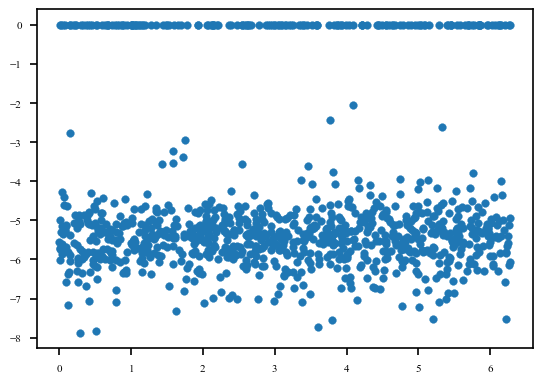

In [46]:
plt.scatter(phase, e_23)

In [64]:
v = np.array([1,2,3])
print(v+10)

[11 12 13]
